# Stock Market Predictor
The code below is used to extract data from a certain stock and apply regression algorithms on these values.

It is based on: https://www.youtube.com/watch?v=JcI5Vnw0b2c&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=2

Author:
fanconic
tria124

## Import Libraries

In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

## Get Stock Data
We use the Yahoo Finance API to get our stock market data.
we will track the UBS stock data.

In [2]:
tickerData = yf.Ticker("UBS")
df = tickerData.history(period='1d', start="2015-1-1", end="2020-04-06")

In [3]:
# Create some extra features
df['hl_pct'] = (df['High'] - df['Close']) / df['Close']
df['delta_pct'] = (df['Close'] - df['Open']) / df['Close']

In [4]:
# Decide how many days ahead our algorithm should predict
future_forecast = 10 # days into the future
df["label"] = df["Close"].shift(-future_forecast)
df.dropna(inplace=True)

## Create Machine Learning Training data
We now create the machine learning training data. our goal is to predict the prices ten days in advanced.

In [5]:
# Training data
X = df.drop(["label"], axis = 1)
X = scale(X)
y = df["label"]

# Train-Test Split
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state= 42, shuffle=True)

## Model
We choose a regression model which gives us the best confidence score.

In [6]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [7]:
score  = model.score(X_test, y_test)
print("R² score of Regressor: ", score)

R² score of Regressor:  0.8241344360000701


## Plot Results
With the plots we want ot have alook at the historical plots, as well as the future predictions

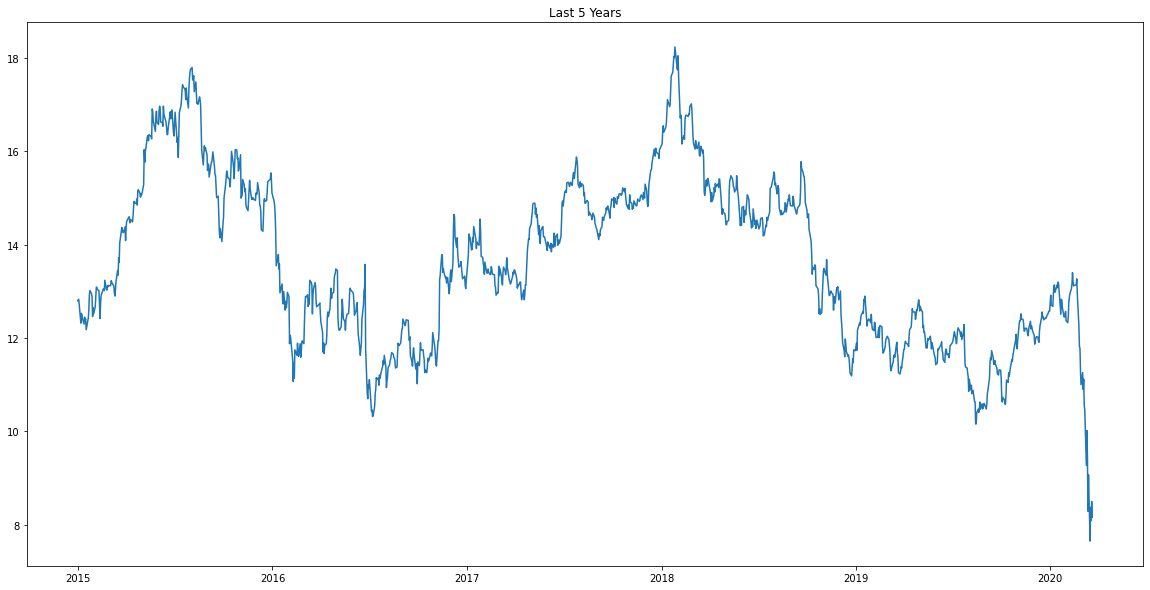

In [8]:
fig = plt.figure(figsize=(20,10))
plt.plot(df.index, df["Close"])
plt.title("Last 5 Years")
plt.show()

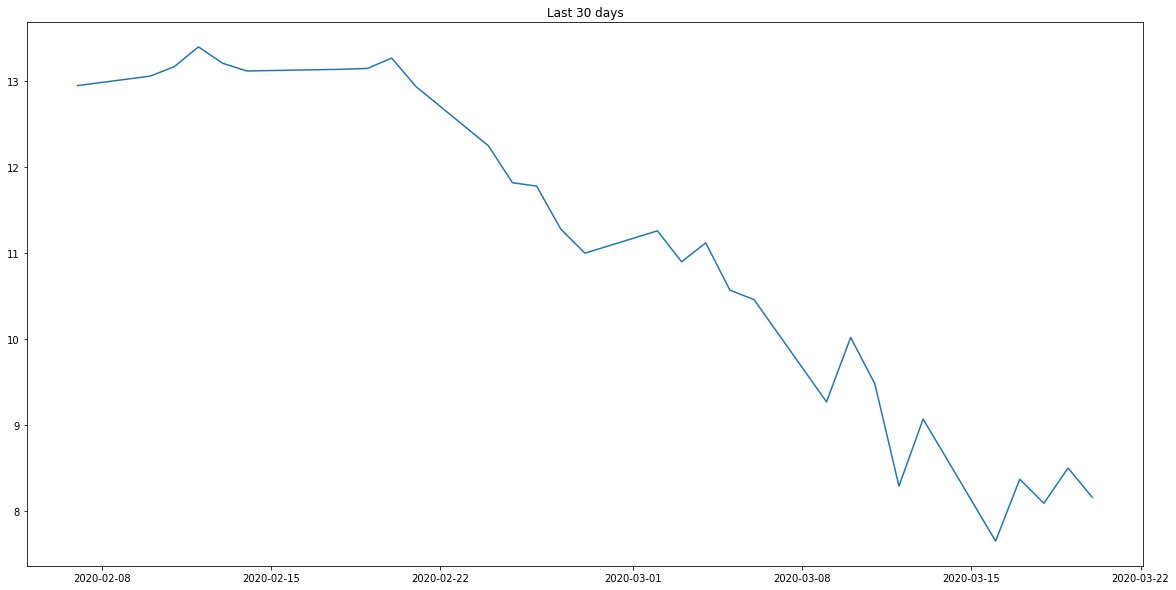

In [9]:
fig = plt.figure(figsize=(20,10))
plt.plot(df.index[-30:], df["Close"][-30:])
plt.title("Last 30 days")
plt.show()

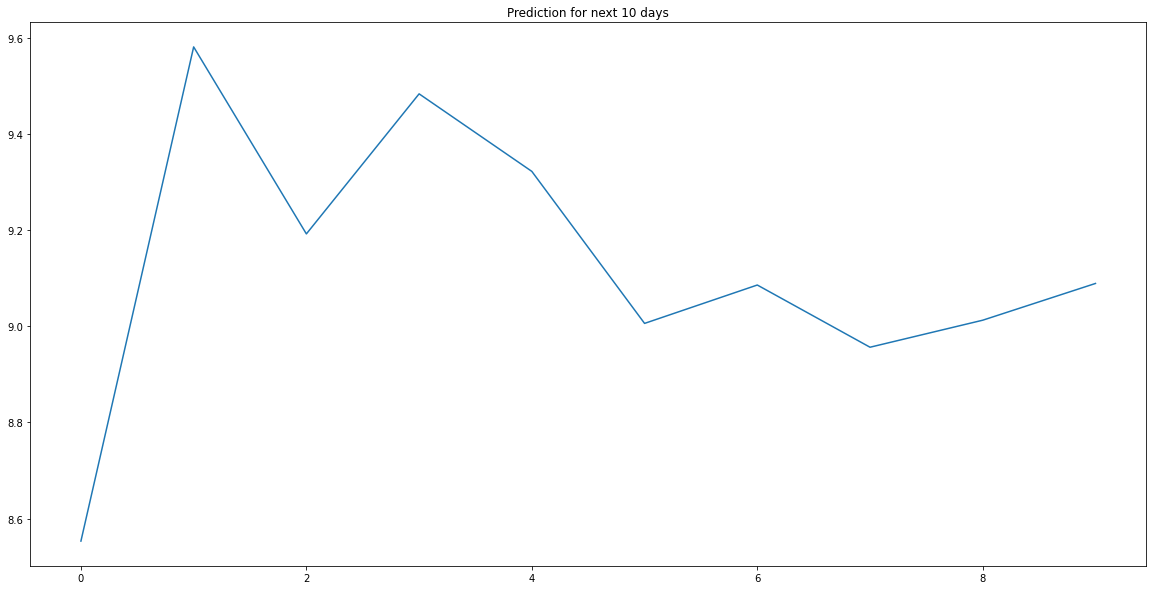

In [10]:
# Prediction for the next 5 days
y_pred = model.predict(X[-10:])
fig = plt.figure(figsize=(20,10))
plt.plot(y_pred)
plt.title("Prediction for next 10 days")
plt.show()

In [11]:
new_df = pd.DataFrame(y_pred, index=pd.to_datetime(['2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30','2020-03-31','2020-04-01','2020-04-02','2020-04-03']))
new_df['Close'] = new_df[0]
df = df.append(new_df)

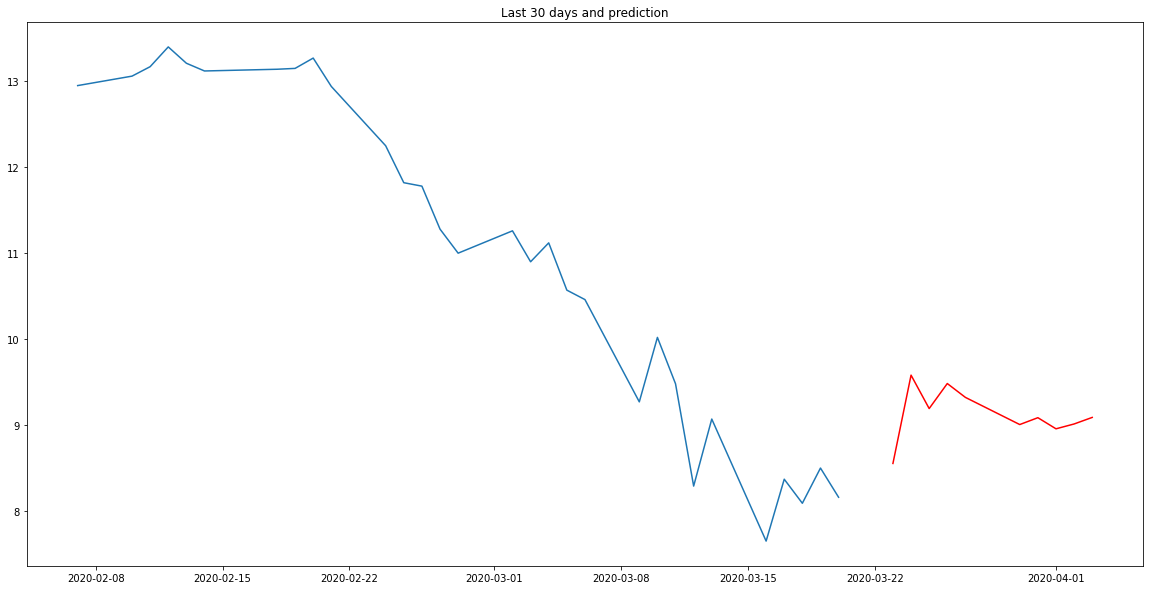

In [12]:
fig = plt.figure(figsize=(20,10))
plt.plot(df.index[-40:-10], df["Close"][-40:-10])
plt.plot(df.index[-10:], df["Close"][-10:], color = 'r')
plt.title("Last 30 days and prediction")
plt.show()

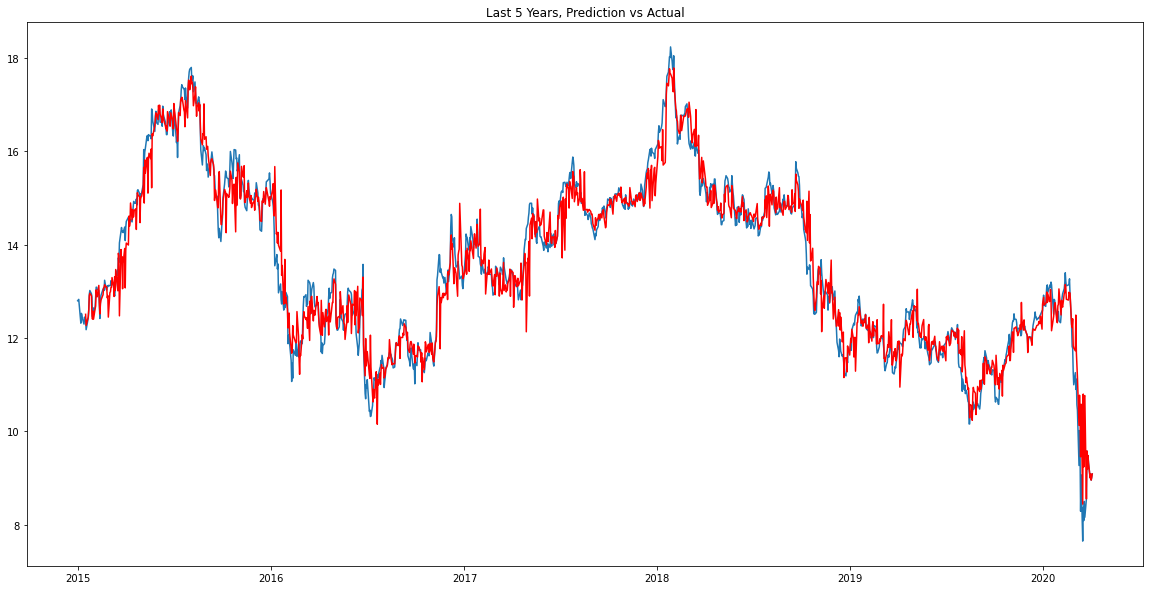

In [13]:
fig = plt.figure(figsize=(20,10))
plt.plot(df.index, df["Close"])
plt.plot(df.index[10:], model.predict(X), color="r")
plt.title("Last 5 Years, Prediction vs Actual")
plt.show()